# Ch 5. 非監督式學習：降維與分群
[5-3 階層式分群](#sec5_3)  
[5-4 DBSCAN 分群](#sec5_4)  
[5-5 鄰近傳播法](#sec5_5)
***

<a id='sec5_3'></a>
## 5-3 階層式分群

In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

df = pd.read_csv('Pokemon_894_12.csv')

# 取出前 20 隻寶可夢進行凝聚分群
df_X = df[df.index < 20]
df_X.shape

(20, 12)

In [2]:
from sklearn.cluster import AgglomerativeClustering

cls = AgglomerativeClustering(n_clusters=4)
cls.fit(df_X.loc[:, 'HP':'Speed'])
cls.labels_

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 3, 3, 1, 2],
      dtype=int64)

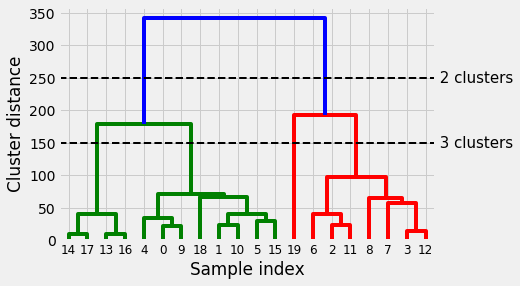

In [3]:
from scipy.cluster import hierarchy

X = df_X.loc[:, 'HP':'Speed']
model = hierarchy.linkage(X, 'ward')

# 繪製樹狀圖
hierarchy.dendrogram(model, orientation="top", labels=df_X.index)
plt.xlabel("Sample index")
plt.ylabel('Cluster distance')

# 標示橫切線
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [250, 250], '--', c='k', lw=2)
ax.text(bounds[1], 250, ' 2 clusters', va='center', fontdict={'size':15})
ax.plot(bounds, [150, 150], '--', c='k', lw=2)
ax.text(bounds[1], 150, ' 3 clusters', va='center', fontdict={'size':15});

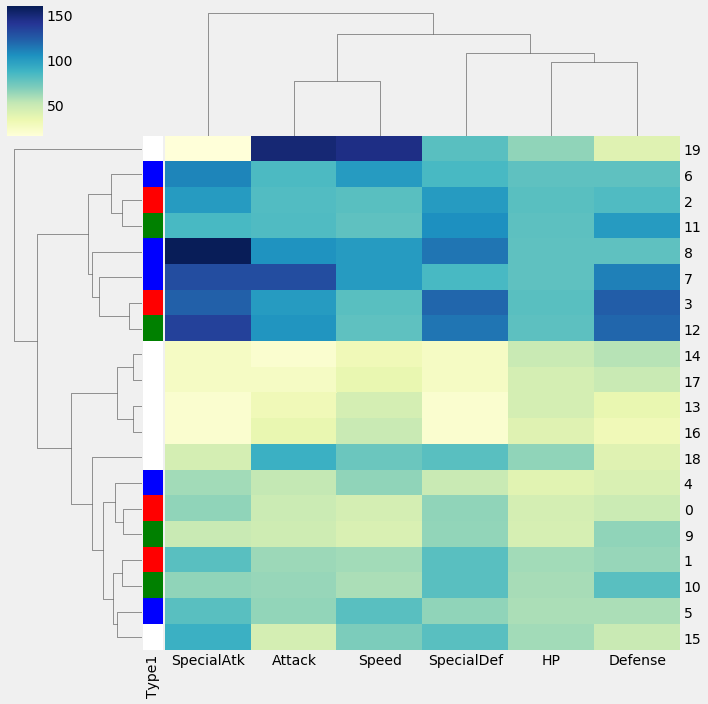

In [4]:
import seaborn as sns

# 標示 Type1
lut = dict(zip(df_X['Type1'].unique(), "rbg"))
row_colors = df_X['Type1'].map(lut)
g = sns.clustermap(X, cmap='YlGnBu', row_colors=row_colors)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0);

<a id='sec5_4'></a>
## 5-4 DBSCAN 分群

In [5]:
from sklearn.cluster import DBSCAN

# 取出前 100 隻寶可夢進行分群
X = df.loc[df.index < 100, 'HP':'Speed']
clf = DBSCAN(eps=35, min_samples=3).fit(X)
clf.labels_

array([ 0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1, -1,  2, -1, -1,  0,  0,  0, -1,  0,  1, -1, -1,  0,  0,
        2, -1, -1, -1, -1,  0,  0,  0,  0,  0,  2, -1,  1, -1, -1],
      dtype=int64)

In [6]:
pd.Series(clf.labels_).value_counts()

 0    69
-1    25
 1     3
 2     3
dtype: int64

<a id='sec5_5'></a>
## 5-5 鄰近傳播法

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation

X = df.loc[df.index < 100, 'HP':'Speed']
# 先標準化
X_std = StandardScaler().fit_transform(X)

clf = AffinityPropagation()
labels = clf.fit_predict(X_std)
labels

array([ 0,  1,  2,  3,  0,  1,  2,  3,  3,  0,  1,  2,  3,  5,  5,  1,  5,
        5,  7,  4,  5,  7,  6,  2,  5,  6,  5,  6,  5,  6,  5,  6, 11,  8,
        5,  7,  8,  5,  7,  8,  0,  2,  0,  2, 13, 13,  5,  6,  0,  1,  2,
        0,  1,  7,  1,  5,  6,  5,  6,  0,  2,  7,  6,  7,  8,  5,  7,  8,
        9,  9, 10, 10, 13, 13,  8,  7,  7,  2,  0,  2, 11, 11,  8,  6,  6,
       13,  8, 12,  0,  1,  7,  5,  6,  0,  8, 13,  8, 11, 14,  9],
      dtype=int64)

In [8]:
from sklearn.metrics.cluster import adjusted_rand_score

y = df.loc[df.index < 100, 'Type1']
adjusted_rand_score(y, labels)

0.05337575775995288